In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Walmart_dataset_modificado.csv', usecols=[3])
dataset = dataset.astype('float32')

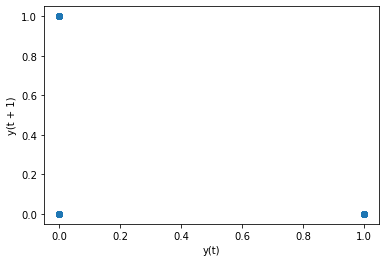

In [2]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(dataset)
pyplot.show()

In [3]:
# %%
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [4]:
# %%
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


124 32


In [5]:
# %%

# convert an array of values into a dataset matrix
# If loop_back is 1, we are using t to predict the value t+1
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [6]:
# %%
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# %%
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# %%
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
122/122 - 4s - loss: 0.0712 - 4s/epoch - 29ms/step
Epoch 2/10
122/122 - 0s - loss: 0.0688 - 409ms/epoch - 3ms/step
Epoch 3/10
122/122 - 0s - loss: 0.0683 - 304ms/epoch - 2ms/step
Epoch 4/10
122/122 - 0s - loss: 0.0682 - 320ms/epoch - 3ms/step
Epoch 5/10
122/122 - 0s - loss: 0.0682 - 320ms/epoch - 3ms/step
Epoch 6/10
122/122 - 0s - loss: 0.0682 - 329ms/epoch - 3ms/step
Epoch 7/10
122/122 - 0s - loss: 0.0682 - 344ms/epoch - 3ms/step
Epoch 8/10
122/122 - 0s - loss: 0.0681 - 320ms/epoch - 3ms/step
Epoch 9/10
122/122 - 0s - loss: 0.0682 - 321ms/epoch - 3ms/step
Epoch 10/10
122/122 - 0s - loss: 0.0683 - 316ms/epoch - 3ms/step


In [7]:
# %%
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


1/1 [==============================] - 0s 32ms/step
Train Score: 0.26 RMSE
Test Score: 0.25 RMSE


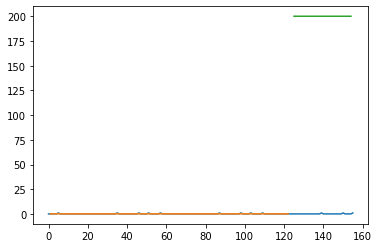

In [8]:
# %%
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot+200)
plt.show()